# Assignment 1
- Dataset 1 - original, with all NaN's filled in.

## Examining the data as-is

In [1]:
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
#convert date to an int, representing days since min(date)
#RainToday and RainTomorrow are currently in form of Yes|No. Change to 0|1.
TARGET="RainTomorrow"
data = pd.read_csv("data/weatherAUS.csv")
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

## Examining missing data

In [2]:
counted=data.count()
to_dump = {}
for col in data.columns:
    if counted[col]!=data.shape[0]:
        missing=data.shape[0]-counted[col]
        percent=int(missing/data.shape[0]*100)
        if percent>=35:
            to_dump[col]={"missing":missing,"percent":percent}
print(f"lets dump columns: {to_dump} as they are largely empty ")

for col in to_dump:
    print(f"Dumping {col} feature as it is missing {to_dump[col]['percent']}% of its values")
    data.pop(col)

lets dump columns: {'Evaporation': {'missing': 62790, 'percent': 43}, 'Sunshine': {'missing': 69835, 'percent': 48}, 'Cloud9am': {'missing': 55888, 'percent': 38}, 'Cloud3pm': {'missing': 59358, 'percent': 40}} as they are largely empty 
Dumping Evaporation feature as it is missing 43% of its values
Dumping Sunshine feature as it is missing 48% of its values
Dumping Cloud9am feature as it is missing 38% of its values
Dumping Cloud3pm feature as it is missing 40% of its values


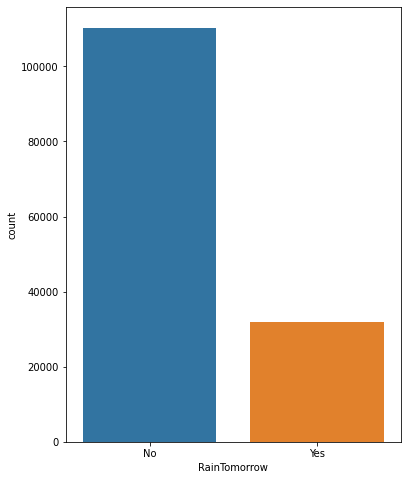

In [3]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=data)
plt.show()

In [4]:
rainy_days = data.query('RainTomorrow == "Yes"').shape[0]
total_days  = data.shape[0]
percent_rainy = rainy_days/total_days
print(f"{int(percent_rainy*100)}% of all tommorrow days were rainy")

21% of all tommorrow days were rainy


## Dealing with simple non-numeric data using simple transforms
Perform the following simple mappings:
- Date:             Date -> days since min(Date)
- RainToday:        Yes | No -> 1 | 0
- RainTommorow:     Yes | No -> 1 | 0

leave the less clear columns, such as 'Location' or WindDir until later

In [5]:
from datetime import datetime
converters={
    "Date": lambda date: (datetime.strptime(date,"%Y-%m-%d")-datetime.strptime('2007-11-01',"%Y-%m-%d")).days,
    "RainToday": lambda x: 0 if x=="No" else 1,
    "RainTomorrow": lambda x: 0 if x=="No" else 1,
}

for key,func in converters.items():
    data[key]=data[key].apply(func)
    print(f"\n{key} converted to numeric data:\n{data[key].describe()}\n\n")


Date converted to numeric data:
count    145460.000000
mean       1981.881156
std         921.022925
min           0.000000
25%        1167.000000
50%        2040.000000
75%        2782.000000
max        3524.000000
Name: Date, dtype: float64



RainToday converted to numeric data:
count    145460.000000
mean          0.241585
std           0.428046
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: RainToday, dtype: float64



RainTomorrow converted to numeric data:
count    145460.000000
mean          0.241606
std           0.428058
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: RainTomorrow, dtype: float64




## Take note of the remaining non-numeric (categorical) data

In [6]:
category_features = [col for col in data.columns if data[col].dtype.name not in ("float64","int64")]
print(f"the following features are non-numerical: {category_features}")

the following features are non-numerical: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


In [7]:
# Filling remaining data which has numpy.NaN
# Specifically, replace NaN with mean(col)

In [7]:
for feature in data.columns:
    if data[feature].dtype.name in ("float64","int64"):
        data[feature].fillna(data[feature].mean(),inplace=True)


## Observing what we have so far

In [8]:
for col in category_features:
    total=data.shape[0]
    col_counts = data[col].value_counts()
    print(f"\n\n** DISTRIBUTION OF {col} FEATURE LABELS")
    print(col_counts/total)



** DISTRIBUTION OF Location FEATURE LABELS
Canberra            0.023622
Sydney              0.022989
Darwin              0.021951
Melbourne           0.021951
Brisbane            0.021951
Adelaide            0.021951
Perth               0.021951
Hobart              0.021951
Albany              0.020899
MountGambier        0.020899
Ballarat            0.020899
Townsville          0.020899
GoldCoast           0.020899
Cairns              0.020899
Launceston          0.020899
AliceSprings        0.020899
Bendigo             0.020899
Albury              0.020899
MountGinini         0.020899
Wollongong          0.020899
Newcastle           0.020892
Tuggeranong         0.020892
Penrith             0.020892
Woomera             0.020686
Nuriootpa           0.020686
Cobar               0.020686
CoffsHarbour        0.020686
Moree               0.020686
Sale                0.020686
PerthAirport        0.020686
PearceRAAF          0.020686
Witchcliffe         0.020686
BadgerysCreek       0.02068

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  int64  
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   WindGustDir    135134 non-null  object 
 6   WindGustSpeed  145460 non-null  float64
 7   WindDir9am     134894 non-null  object 
 8   WindDir3pm     141232 non-null  object 
 9   WindSpeed9am   145460 non-null  float64
 10  WindSpeed3pm   145460 non-null  float64
 11  Humidity9am    145460 non-null  float64
 12  Humidity3pm    145460 non-null  float64
 13  Pressure9am    145460 non-null  float64
 14  Pressure3pm    145460 non-null  float64
 15  Temp9am        145460 non-null  float64
 16  Temp3pm        145460 non-null  float64
 17  RainToday      145460 non-nul

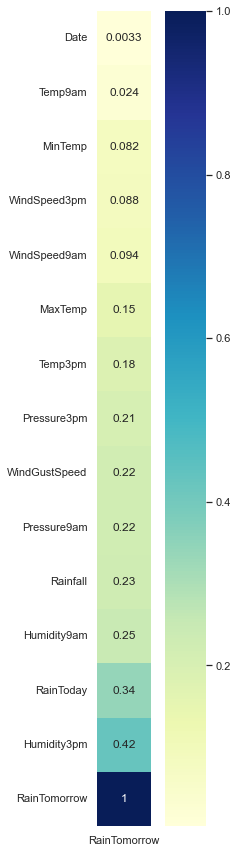

In [9]:
def observe_data(df:pd.DataFrame)->None:
    y_size = df.shape[1]
    sns.set(rc = {'figure.figsize':(5,(1*y_size))})
    col_vec = df.corr()[TARGET]
    col_vec = pd.DataFrame(col_vec)
    col_vec=col_vec.apply(lambda x: numpy.abs(x))  # ABS(Correlation) -- remove negatives, rank by absolute val
    col_vec=col_vec.sort_values(TARGET)
    sns.heatmap(col_vec, annot=True, cmap='YlGnBu',square=True)
    print(f"Mean-Absolute Pearson Correlation: {col_vec.mean()}")

data.info()
data.head()
data.describe()

print("Pearson's correlation of features")
observe_data(data[[col for col in data.columns if col not in category_features]])


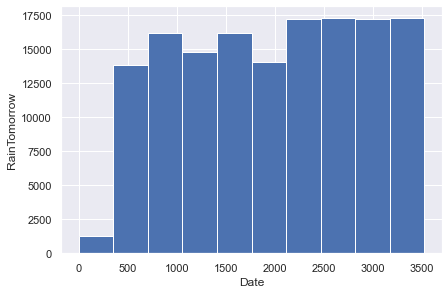

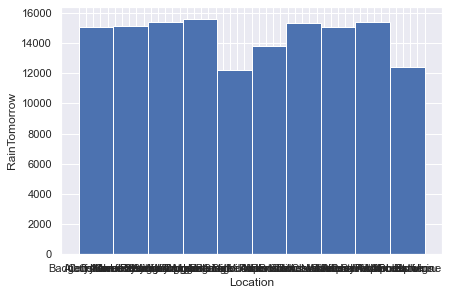

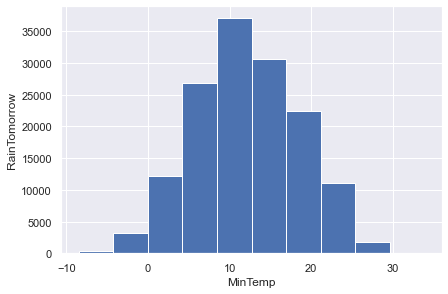

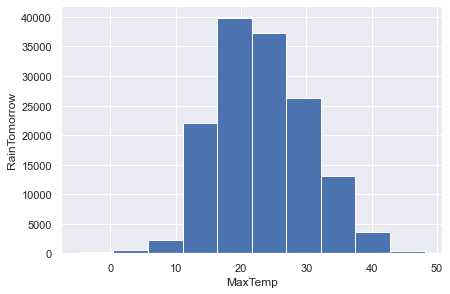

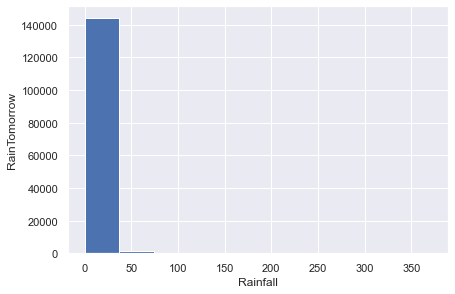

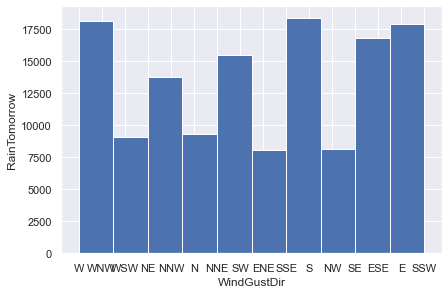

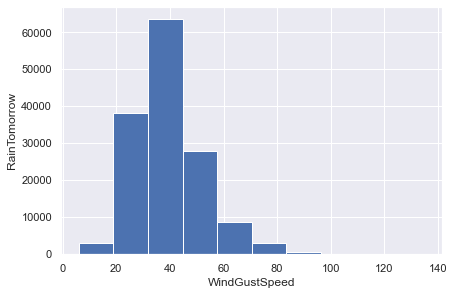

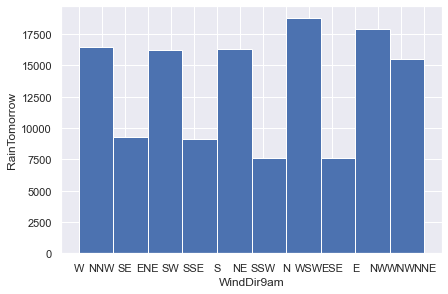

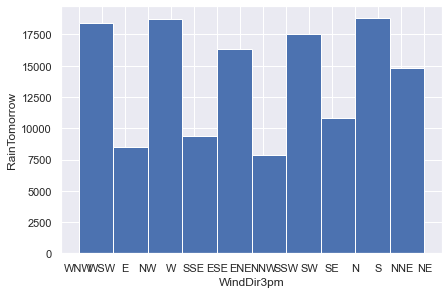

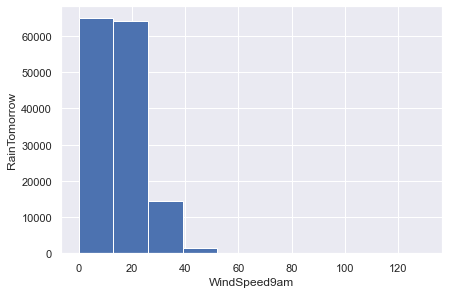

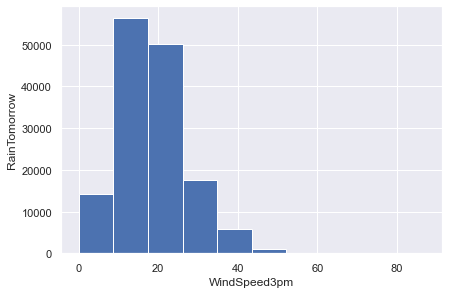

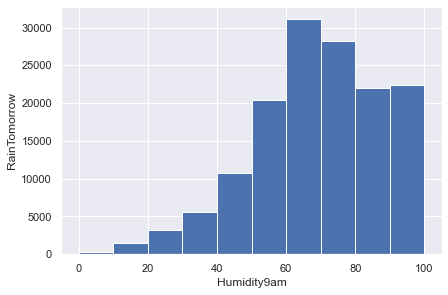

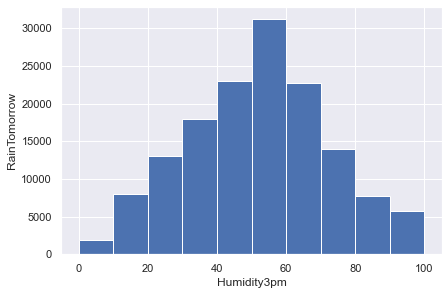

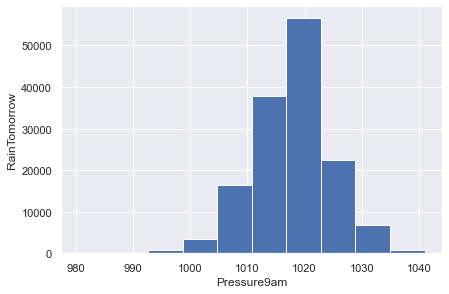

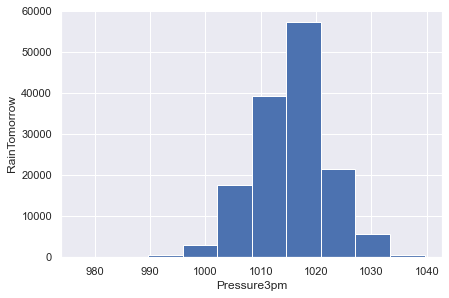

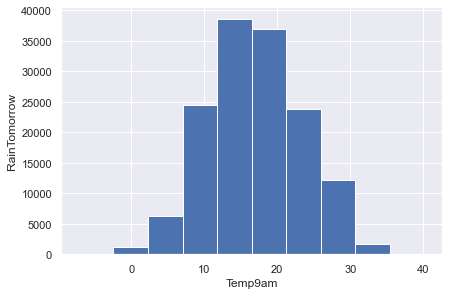

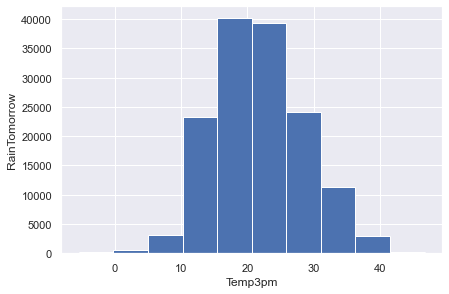

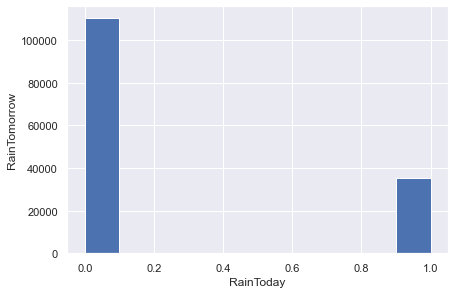

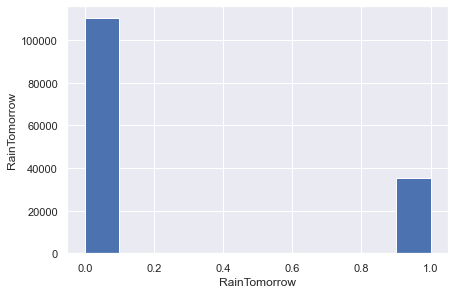

In [10]:
for feature in data.columns:
    if feature=="RainTomorrow":
        pass
    plt.figure(figsize=(15,10))
    plt.subplot(2, 2, 1)
    fig = data[feature].hist()
    fig.set_xlabel(feature)
    fig.set_ylabel('RainTomorrow')


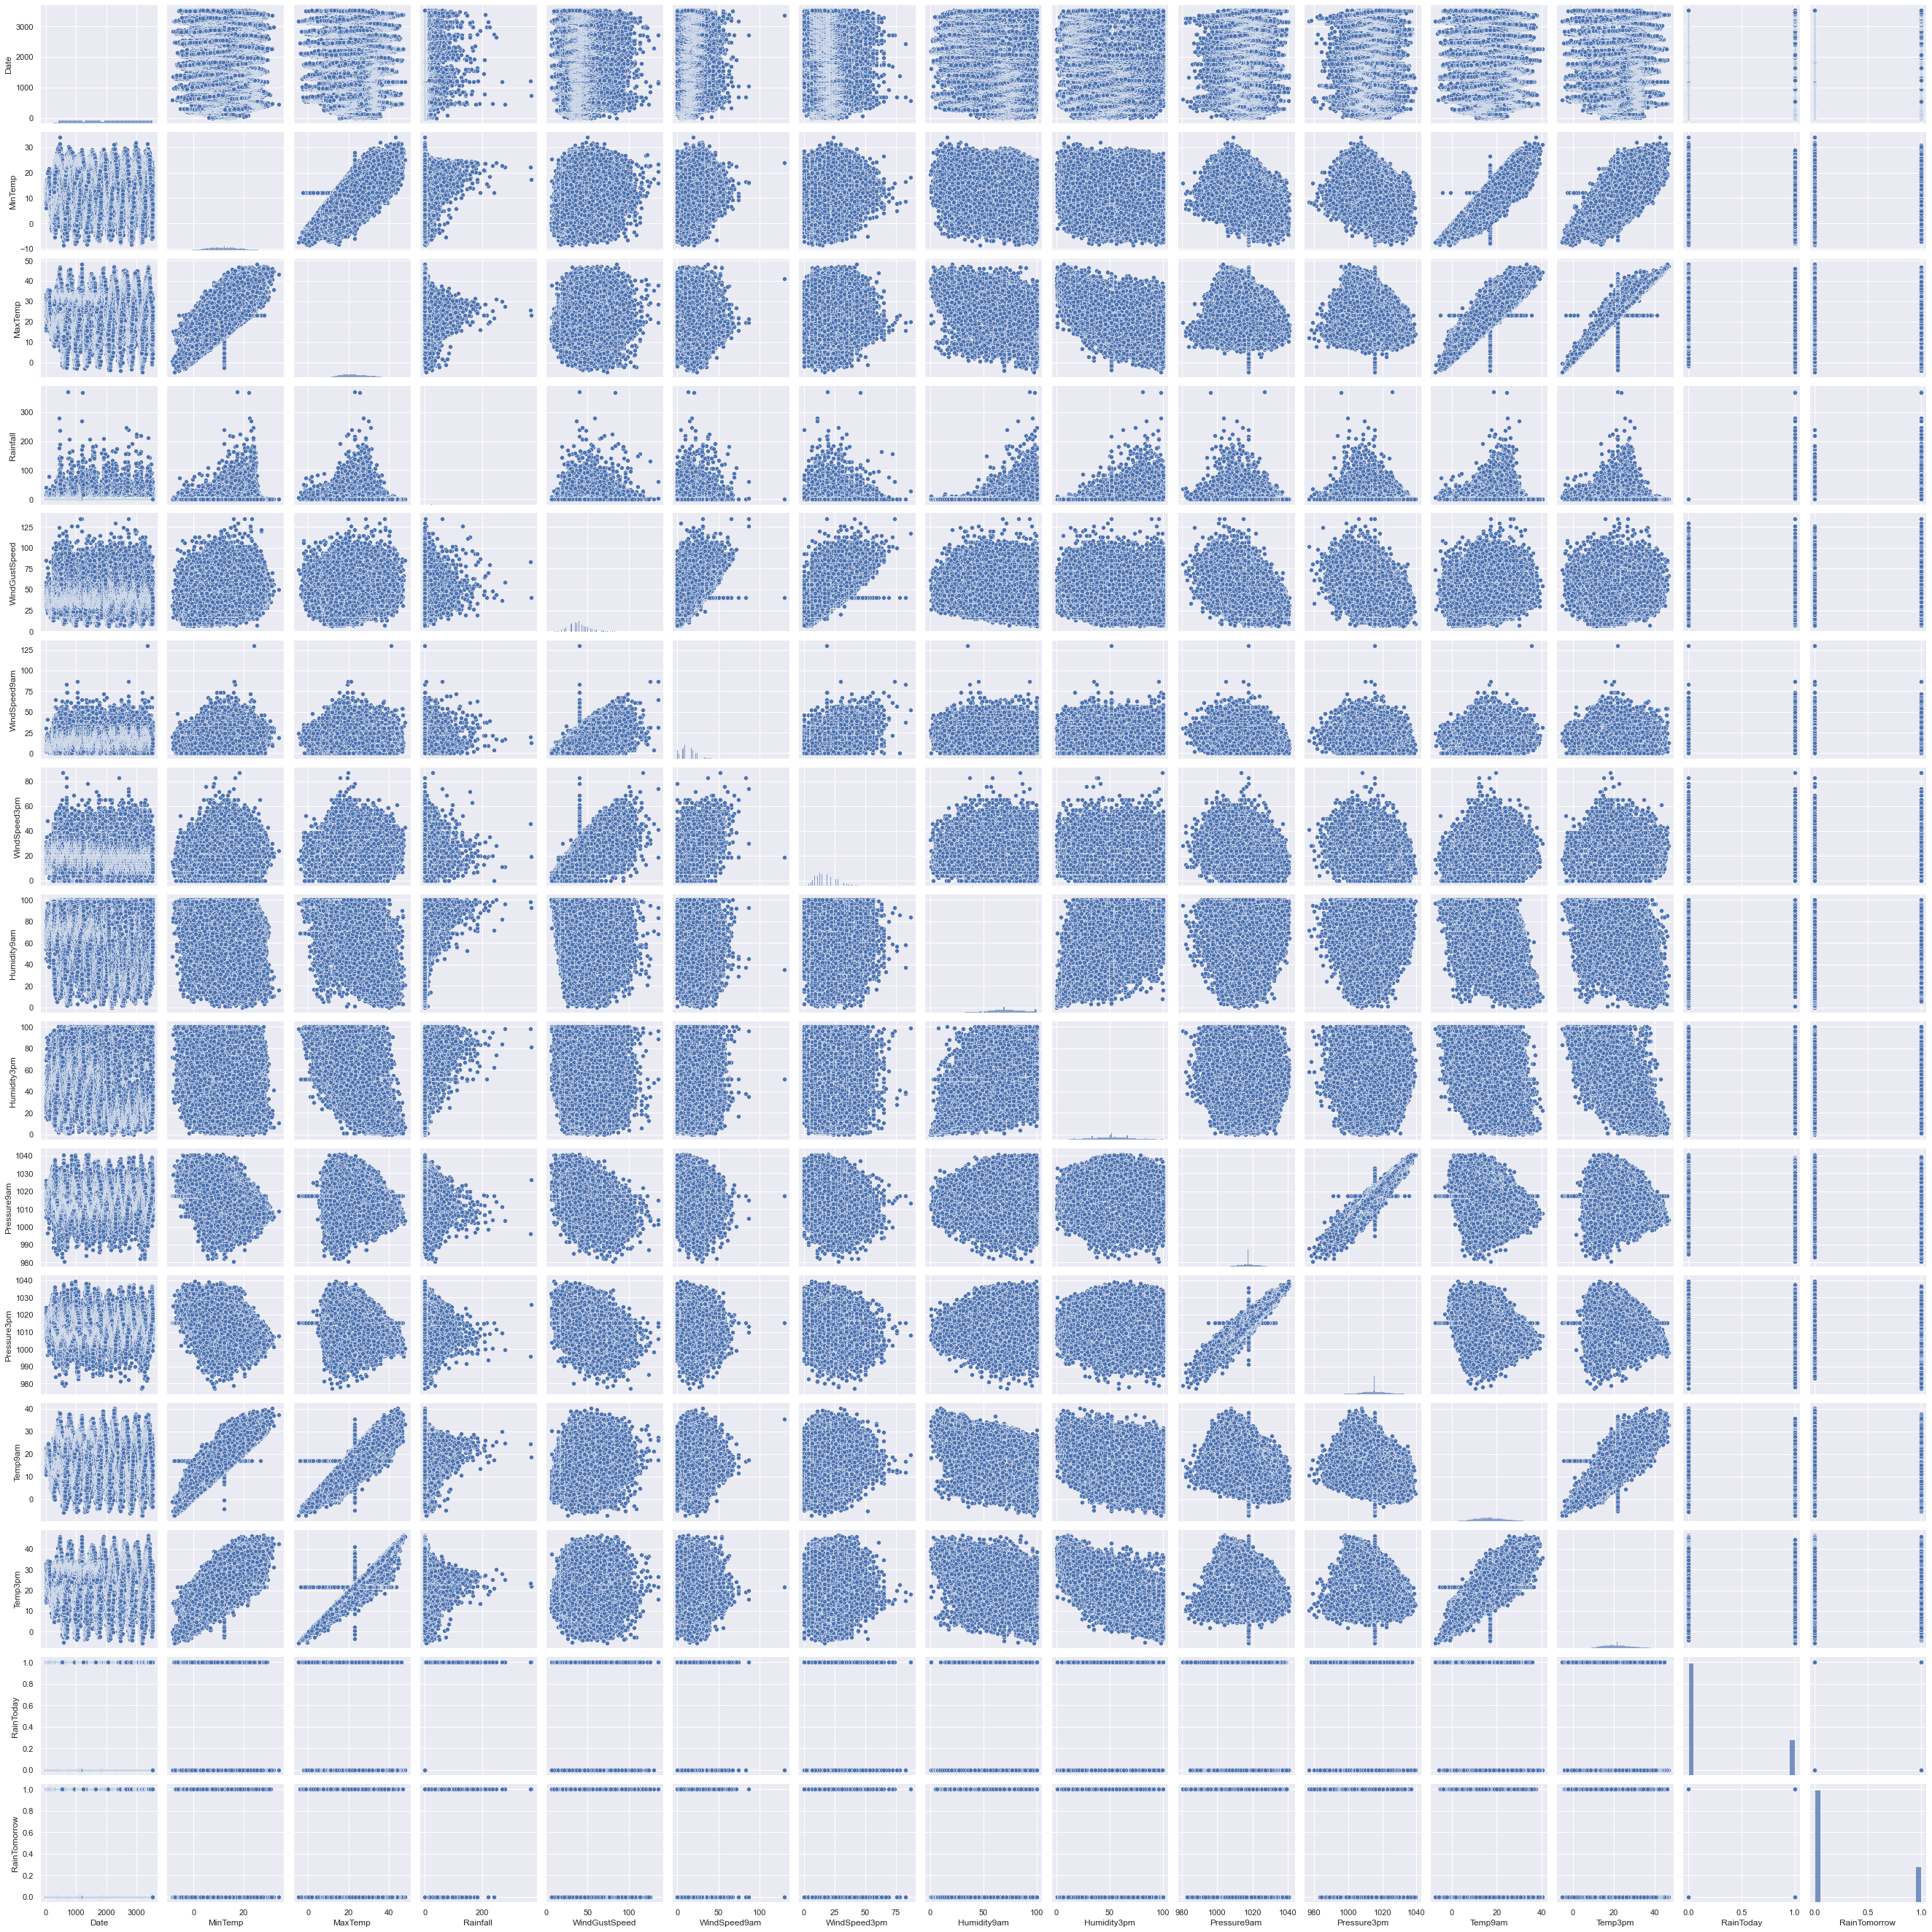

In [12]:
sns.pairplot(data[[col for col in data.columns if col not in category_features]], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

## Date feature looks poorly correlated to target

In [11]:
data=data.drop("Date",axis=1)

## Dataset 0 - Dealing with non-numerical categories using ordinals
try simply assigning ordinal numbers to categorical features

Mean-Absolute Pearson Correlation: RainTomorrow    0.199093
dtype: float64


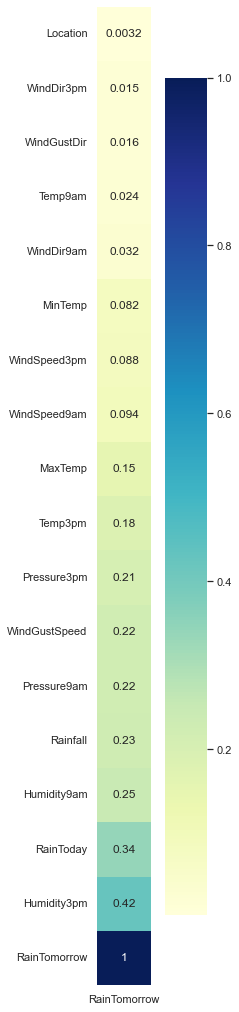

In [12]:
dataset0=data.copy(deep=True)
#remove nulls and replace with an arbitrary label for later encoding
if dataset0.isnull().any().any():
    dataset0=dataset0.fillna(value=' ')
#find all categorical feature columns
category_features = [col for col in data.columns if data[col].dtype.name not in ("float64,int64") ]
#make a mapping dict using sorted, unique values
mappings={_category:{_f:_i for _i,_f in enumerate(dataset0[_category].sort_values().unique())} for _category in category_features}
# apply the mapping
for _cat in category_features:
    dataset0[_cat]=dataset0[_cat].apply(lambda x: mappings[_cat][x])
observe_data(dataset0)

## Dataset 1 - Dealing with non-numerical categories using dummies
turn each feature-value into its own binary feature

Mean-Absolute Pearson Correlation: RainTomorrow    0.051017
dtype: float64


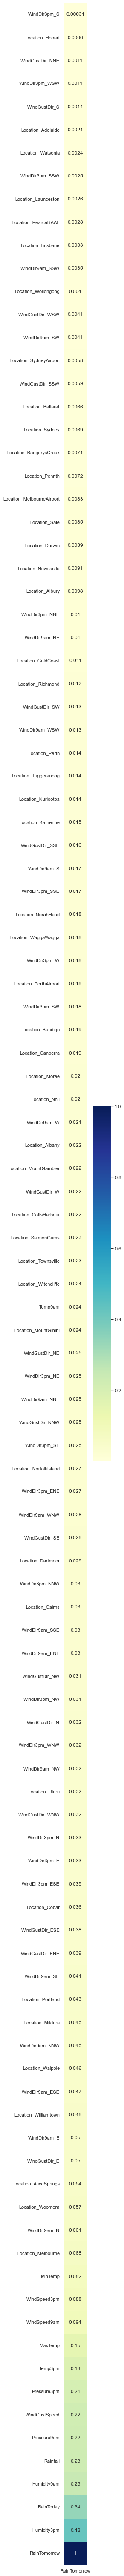

In [13]:
dataset1=data.copy(deep=True)

category_features = [col for col in data.columns if data[col].dtype.name not in ("float64,int64") ]
dataset1 = pd.get_dummies(data, columns=category_features)
observe_data(dataset1)



Dataset1 has mapped all the categorical data (ie 'NW', or 'Dartmoor') to unique features with a 0 or 1 value.
The data set is much larger, with lower correlation than the initial dataset, but does had many simple features.

The dimensionality of this may do more harm than good

## Dataset 2 - Dealing with non-numerical through other means
try a third dataset, where hopefully 'intelligent' processes are used to turn categorical data into numerical data

Mean-Absolute Pearson Correlation: RainTomorrow    0.199578
dtype: float64


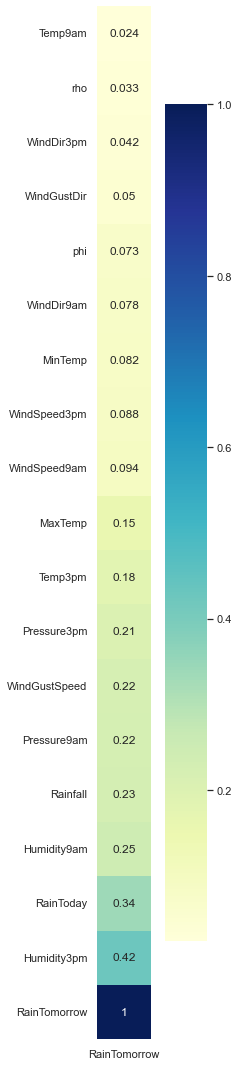

In [14]:
import json

def geocode_locations(df:pd.DataFrame)->pd.DataFrame:
    def convert_cartesian_to_polar(lat_long:tuple) -> (float, float):
        return (numpy.sqrt(lat_long[0] ** 2 + lat_long[1] ** 2), numpy.arctan2(lat_long[0], lat_long[1]))
    geocoded = json.load(open("geocoded-cities.json","r"))
    locations = df.pop("Location")
    latitudes = []
    longitudes = []
    for loc in locations.values:
        latitudes.append(geocoded[loc]["lat"])
        longitudes.append(geocoded[loc]["long"])
    lat_mean = numpy.mean(latitudes)
    long_mean = numpy.mean(longitudes)
    rhos = []
    phis = []
    for rho, phi in map(convert_cartesian_to_polar,zip(map(lambda x: x-lat_mean,latitudes),map(lambda x: x-long_mean,longitudes))):
        rhos.append(rho)
        phis.append(phi)
    df["phi"]=phis
    df["rho"]=rhos
    return df
def cardinal_direction_to_degrees(df:pd.DataFrame)->pd.DataFrame:
    cardinal_directions = {  # -180 to +180.
        'N': 0,
        'NNE': 22.5,
        'NE': 45.0,
        'ENE': 67.5,
        'E': 90.0,
        'ESE': 112.5,
        'SE': 135.0,
        'SSE': 157.5,
        'S': 180.0,
        'SSW': -157.5,
        'SW': -135.0,
        'WSW': -112.5,
        'W': -90.0,
        'WNW': -67.5,
        'NW': -45.0,
        "NNW": -22.5
    }
    for feature in ['WindGustDir', 'WindDir9am', 'WindDir3pm']:
        df[feature]=df[feature].apply(lambda x: numpy.nan if x is numpy.nan else cardinal_directions[x])
        df[feature].fillna(df[feature].mean(),inplace=True)
    return df

dataset2=data.copy(deep=True)
dataset2=geocode_locations(dataset2)
dataset2=cardinal_direction_to_degrees(dataset2)
observe_data(dataset2)



## Training some models

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

"""
train_test_data={
        "dataset_i":{
            "data":{
                "X_train":  X_train,
                "X_test":   X_test,
                "y_train":  y_train,
                "y_test":   y_test
            },
                "models":{
                    "model_name": accuracy
                }
            }
    }
"""
train_test_data={}
scaler = MinMaxScaler()

print("splitting train and test data")
for i,dataset in enumerate([dataset0,dataset1,dataset2]):
    X_train, X_test, y_train, y_test = train_test_split(dataset.drop(TARGET,axis=1), dataset[[TARGET]])
    cols = X_train.columns
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    X_train = pd.DataFrame(X_train, columns=[cols])
    X_test = pd.DataFrame(X_test, columns=[cols])
    train_test_data.update({
        f"dataset{i}":{
            "data":{
                "X_train":X_train,"X_test":X_test,"y_train":y_train,"y_test":y_test
        },
            "models":{}
        }
    })
print("done")

splitting train and test data
done


In [33]:
from sklearn.metrics import accuracy_score

import warnings
from sklearn.exceptions import DataConversionWarning,ConvergenceWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier


def fit_test_model(model, model_name, key, value):
    global train_test_data
    model.fit(value["data"]["X_train"],value["data"]["y_train"])
    y_predicted = model.predict(value["data"]["X_test"])
    test_accuracy=accuracy_score(value["data"]["y_test"], y_predicted.ravel())
    y_trained = model.predict(value["data"]["X_train"])
    train_accuracy = accuracy_score(value["data"]["y_train"], y_trained.ravel())
    train_test_data[key]["models"][model_name]={
        "test_accuracy":test_accuracy,
        "train_accuracy":train_accuracy
    }

# move our results for each model into a single table, rank performance, and display table'
def display_test_results(train_test_data:dict)->None:
    results={"ModelName":[],"Dataset":[],"TestAccuracy":[],"TrainAccuracy":[]}
    for dataset,record in train_test_data.items():
        for modelname in record["models"].keys():
            test_accuracy=record["models"][modelname]["test_accuracy"]*100
            train_accuracy=record["models"][modelname]["train_accuracy"]*100
            results["ModelName"].append(modelname)
            results["Dataset"].append(dataset.replace("dataset",""))
            results["TestAccuracy"].append(test_accuracy)
            results["TrainAccuracy"].append(train_accuracy)
    results=pd.DataFrame(results)
    sorted=results.sort_values(by=['TestAccuracy','TrainAccuracy'],ascending=False)
    print(sorted)

default_models={
    "default_decision_tree_classifier":DecisionTreeClassifier(),
    "default_multi-layer_perceptron_classifier":MLPClassifier(),
    "default_gradient-boosting_classifier": GradientBoostingClassifier(),
    "default_linear_support_vector_classifier":LinearSVC(),
    "default_knn_classifier":KNeighborsClassifier()
}

In [34]:
for model_name,model in default_models.items():
    for key,value in train_test_data.items():
        print(f"training {model_name} using {key}")
        fit_test_model(model, model_name, key, value)

print("Done training")




training default_decision_tree_classifier using dataset0
training default_decision_tree_classifier using dataset1
training default_decision_tree_classifier using dataset2
training default_multi-layer_perceptron_classifier using dataset0
training default_multi-layer_perceptron_classifier using dataset1
training default_multi-layer_perceptron_classifier using dataset2
training default_gradient-boosting_classifier using dataset0
training default_gradient-boosting_classifier using dataset1
training default_gradient-boosting_classifier using dataset2
training default_linear_support_vector_classifier using dataset0
training default_linear_support_vector_classifier using dataset1
training default_linear_support_vector_classifier using dataset2
training default_knn_classifier using dataset0
training default_knn_classifier using dataset1
training default_knn_classifier using dataset2
Done training


In [35]:
display_test_results(train_test_data)

                                    ModelName Dataset  TestAccuracy  \
12       default_gradient-boosting_classifier       2     84.342087   
11  default_multi-layer_perceptron_classifier       2     84.212842   
7        default_gradient-boosting_classifier       1     84.152344   
6   default_multi-layer_perceptron_classifier       1     84.023099   
2        default_gradient-boosting_classifier       0     83.935102   
1   default_multi-layer_perceptron_classifier       0     83.690362   
8    default_linear_support_vector_classifier       1     83.225629   
14                     default_knn_classifier       2     83.027636   
3    default_linear_support_vector_classifier       0     82.298914   
13   default_linear_support_vector_classifier       2     82.285164   
4                      default_knn_classifier       0     82.169669   
9                      default_knn_classifier       1     79.232779   
10           default_decision_tree_classifier       2     77.860580   
5     

In [21]:
## Lets tune the models

In [36]:
from sklearn.ensemble import RandomForestClassifier
adjusted_models={
    "adjusted_random_forest_classifier":RandomForestClassifier(min_samples_split=8,max_depth=8,min_samples_leaf=2),
    "adjusted_multi-layer_perceptron_classifier":MLPClassifier(learning_rate='adaptive',hidden_layer_sizes=(150,)),
    "adjusted_gradient-boosting_classifier": GradientBoostingClassifier(loss='exponential',n_estimators=50,min_samples_split=4),
    "adjusted_support_vector_classifier":SVC(degree=2,cache_size=1000,max_iter=200),
    "adjusted_knn_classifier":KNeighborsClassifier(weights='distance')
}

In [37]:
for model_name,model in adjusted_models.items():
    for key,value in train_test_data.items():
        print(f"training {model_name} using {key}")
        fit_test_model(model, model_name, key, value)
print("done")


training adjusted_random_forest_classifier using dataset0
training adjusted_random_forest_classifier using dataset1
training adjusted_random_forest_classifier using dataset2
training adjusted_multi-layer_perceptron_classifier using dataset0
training adjusted_multi-layer_perceptron_classifier using dataset1
training adjusted_multi-layer_perceptron_classifier using dataset2
training adjusted_gradient-boosting_classifier using dataset0
training adjusted_gradient-boosting_classifier using dataset1
training adjusted_gradient-boosting_classifier using dataset2
training adjusted_support_vector_classifier using dataset0
training adjusted_support_vector_classifier using dataset1
training adjusted_support_vector_classifier using dataset2
training adjusted_knn_classifier using dataset0
training adjusted_knn_classifier using dataset1
training adjusted_knn_classifier using dataset2
done


In [38]:
display_test_results(train_test_data)

                                     ModelName Dataset  TestAccuracy  \
26  adjusted_multi-layer_perceptron_classifier       2     84.479582   
22        default_gradient-boosting_classifier       2     84.342087   
21   default_multi-layer_perceptron_classifier       2     84.212842   
12        default_gradient-boosting_classifier       1     84.152344   
11   default_multi-layer_perceptron_classifier       1     84.023099   
2         default_gradient-boosting_classifier       0     83.935102   
25           adjusted_random_forest_classifier       2     83.819607   
27       adjusted_gradient-boosting_classifier       2     83.709611   
1    default_multi-layer_perceptron_classifier       0     83.690362   
6   adjusted_multi-layer_perceptron_classifier       0     83.646363   
17       adjusted_gradient-boosting_classifier       1     83.574866   
7        adjusted_gradient-boosting_classifier       0     83.473120   
5            adjusted_random_forest_classifier       0     83.42

Lets pick the best data set and model from each ML algo from what weve seen so far

In [39]:
all_models = default_models | adjusted_models

BEST_MODELS_AND_DATA = [
    {
        "adjusted_multi-layer_perceptron_classifier":{
            "model":all_models["adjusted_multi-layer_perceptron_classifier"],
            "data":dataset2
        }
    },{
        "default_gradient-boosting_classifier":{
            "model":all_models["default_gradient-boosting_classifier"],
            "data":dataset2
        }
    },{
        "adjusted_random_forest_classifier":
            {
                "model":all_models["adjusted_random_forest_classifier"],
                "data":dataset2
            }
    },{
        "default_linear_support_vector_classifier":
            {
                "model":all_models["default_linear_support_vector_classifier"],
                "data":dataset1
            }
    },
    {
        "adjusted_knn_classifier":
            {
                "model":all_models["adjusted_knn_classifier"],
                "data":dataset2
            }
    }
]



At this point we have some good models.  We can see that they are not overfit by comparingTestAccuracy with TrainAccuracy.  Lets explore how well these models train

In [40]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import numpy as np


"""
   Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
"""
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """

    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt






Processing adjusted_multi-layer_perceptron_classifier learning curve


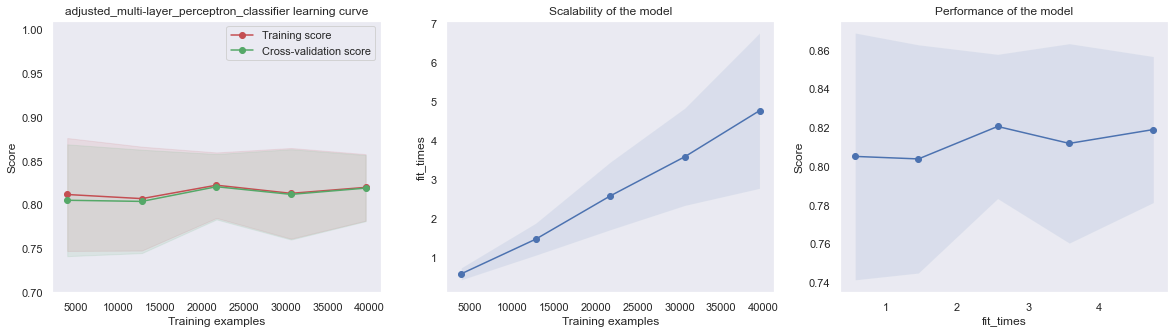

Processing default_gradient-boosting_classifier learning curve


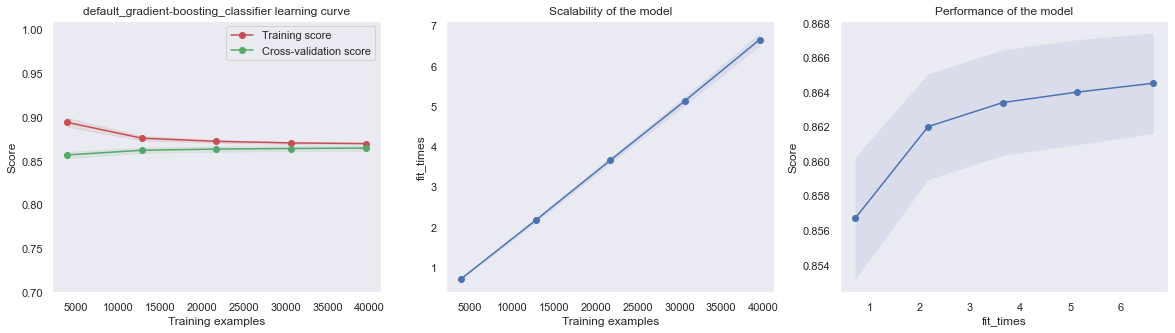

Processing adjusted_random_forest_classifier learning curve


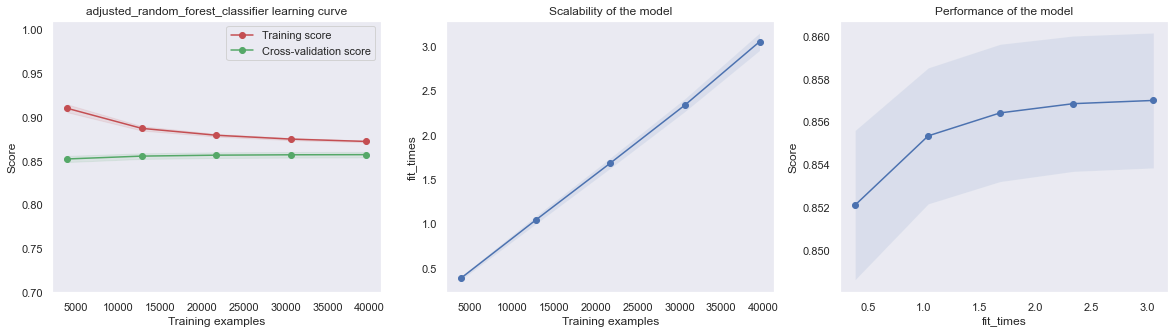

Processing default_linear_support_vector_classifier learning curve


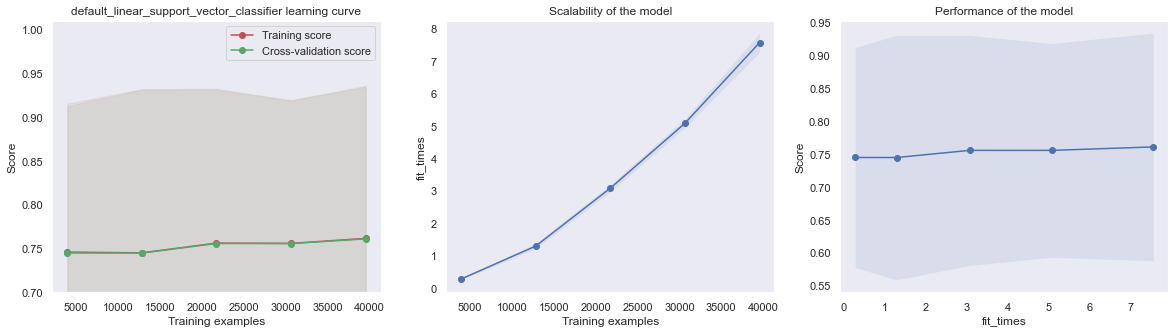

Processing adjusted_knn_classifier learning curve


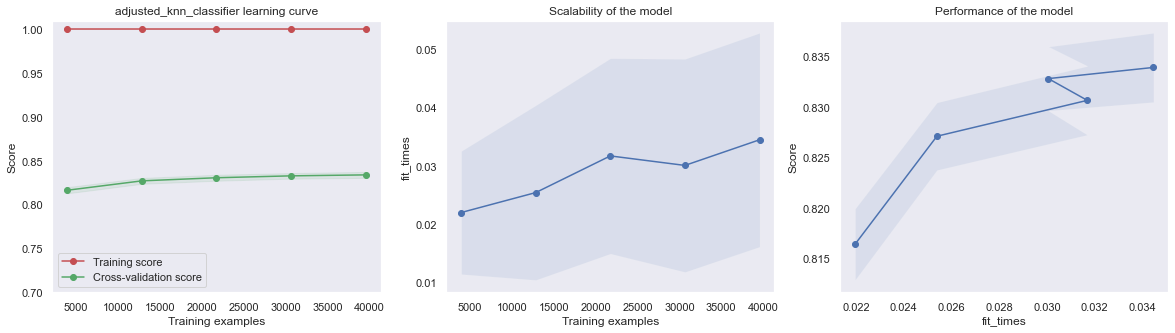

In [41]:

for record in BEST_MODELS_AND_DATA:
    for model_name in record.keys():
        title = f"{model_name} learning curve"
        print(f"Processing {title}")
        model=record[model_name]["model"]
        dataset=record[model_name]["data"]
        drop_size = int(len(dataset)*0.66)   #drop two thirds of the dataset... quicker evaluation time
        dataset=dataset.iloc[drop_size:,:]  
        X = dataset.copy(deep=True)
        y = X.pop(TARGET)
        cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
        plot_learning_curve(model, title, X, y, ylim=(0.7, 1.01),cv=cv, n_jobs=4)
        plt.show()


In [ ]:
print("Done")

